In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [65]:
hrv_measurements = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/refs/heads/master/data/hrv_measurements.csv")

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [4]:
print("Data Structre")
print("----------------------")
print(f"Dimensions: {hrv_measurements.shape}")
print("----------------------")
print(f"Data types: \n {hrv_measurements.dtypes}")
print("----------------------")
print(f"Missing values: \n {hrv_measurements.isnull().sum()}")

Data Structre
----------------------
Dimensions: (3245, 22)
----------------------
Data types: 
 user_code                object
rr_code                  object
measurement_datetime     object
time_of_day              object
bpm                       int64
meanrr                  float64
mxdmn                   float64
sdnn                    float64
rmssd                   float64
pnn50                   float64
mode                    float64
amo                     float64
lf                      float64
hf                      float64
vlf                     float64
lfhf                    float64
total_power             float64
how_feel                  int64
how_mood                  int64
how_sleep               float64
tags                     object
rr_data                  object
dtype: object
----------------------
Missing values: 
 user_code                  0
rr_code                    0
measurement_datetime       0
time_of_day                0
bpm                        0

##Interpretation

**Interpretation**

The dataset contains **3245 observations** (samples), each with **22 features**. The features represent a mix of categorical, numeric, and datetime data types. Here's a breakdown of the data types:
- Categorical features (object type) include: `user_code`, `rr_code`, `measurement_datetime`, `time_of_day`, `tags`, and `rr_data`. These likely represent identifiers, timestamps, and additional labels related to the dataset.

- Numerical features include both integers (`bpm`, `how_feel`, `how_mood`) and floating-point values (`meanrr`, `mxdmn`, `sdnn`, `rmssd`, etc.), most of which are heart rate variability (HRV) measurements. 

- The `bpm` and `how_feel`, `how_mood` variables are integers, likely representing direct measurements or scales, while features like `meanrr`, `lf`, `hf` (HRV-related metrics) are floating-point measurements.

The dataset has **two columns with missing values**:
- **`how_sleep`**: 1779 missing values, which represents over half of the dataset (~55%). This could indicate that this feature was not recorded consistently and may require handling through imputation or removal.

- **`tags`**: 1044 missing values (~32%). This suggests that tags were not always recorded for each observation, so missing data handling strategies should be considered.

Other than these two columns, all other features are complete, with no missing data, meaning the majority of the dataset is intact for analysis. The missing values in the dataset will require attention, especially for features with significant proportions of missing data.

In [26]:
#Descriptive Statistics
numeric_columns = hrv_measurements.select_dtypes(include=[np.number]).columns

print("Central Tendency Measures ")
print(hrv_measurements[numeric_columns].describe().loc[["mean","50%"]])
print("\n ------------------------------------------------------------------------------ \n")
print("Dispersion Measures \n")
print(hrv_measurements[numeric_columns].describe().loc[["std","min","max"]])

Central Tendency Measures 


            bpm      meanrr     mxdmn       sdnn      rmssd      pnn50  \
mean  73.257935  839.600366  0.184635  52.489218  52.814196  20.615609   
50%   72.000000  829.100000  0.160000  46.919000  42.869000  16.160000   

          mode       amo          lf           hf         vlf      lfhf  \
mean  0.837465  46.78829  927.038213  1125.041294  578.229892  2.397769   
50%   0.825000  45.00000  423.000000   380.000000  293.000000  0.862000   

      total_power  how_feel  how_mood  how_sleep  
mean  2630.309399 -0.235439 -0.076733  -0.065484  
50%   1387.000000  0.000000  0.000000   0.000000  

 ------------------------------------------------------------------------------ 

Dispersion Measures 

            bpm       meanrr     mxdmn        sdnn       rmssd      pnn50  \
std   12.201088   137.420367  0.107456   29.369506   39.353213  18.588156   
min   44.000000   477.730000  0.030000    9.515000    6.340000   0.000000   
max  125.000000  1346.740000  0.790000  206.631000  310.800000

In [5]:
hrv_measurements.describe()

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep
count,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,1466.000000
mean,73.257935,839.600366,0.184635,52.489218,52.814196,20.615609,0.837465,46.788290,927.038213,1125.041294,578.229892,2.397769,2630.309399,-0.235439,-0.076733,-0.065484
std,12.201088,137.420367,0.107456,29.369506,39.353213,18.588156,0.144769,16.418873,1455.424089,2490.540413,876.679652,5.750760,3912.247496,0.706262,0.655032,0.708656
min,44.000000,477.730000,0.030000,9.515000,6.340000,0.000000,0.475000,12.000000,2.000000,4.000000,1.000000,0.032000,44.000000,-2.000000,-2.000000,-2.000000
25%,65.000000,742.490000,0.110000,32.585000,28.985000,6.060000,0.725000,35.000000,151.000000,158.000000,116.000000,0.399000,620.000000,-1.000000,0.000000,0.000000
50%,72.000000,829.100000,0.160000,46.919000,42.869000,16.160000,0.825000,45.000000,423.000000,380.000000,293.000000,0.862000,1387.000000,0.000000,0.000000,0.000000
75%,81.000000,925.933000,0.220000,64.406000,62.485000,29.290000,0.925000,57.000000,1059.000000,993.000000,693.000000,1.966000,2906.000000,0.000000,0.000000,0.000000
max,125.000000,1346.740000,0.790000,206.631000,310.800000,91.920000,1.325000,98.000000,15522.000000,33490.000000,18468.000000,105.625000,41118.000000,2.000000,2.000000,2.000000


Report includes a title, authors, dates, and relevant information for running it at the top 
Report includes a reference to the original dataset
Data context and sampling is documented in markdown
Code and documented interpretation of data structure 

Strategies for handling missing values, outliers, and removing duplicates are implemented and/or discussed
Appropriate data transformation is performed
A discussion on data quality assessment is included and incorporates the following components: data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance

### Interpretation


#### Central Tendency Measures:

- **Mean**: Provides the average value for each feature.

  - For example, the mean heart rate (`bpm`) is 73.26 beats per minute, and the mean `meanrr` is 839.6 milliseconds.

  - Features like `lf`, `hf`, and `vlf` (heart rate variability components) have large means, indicating wide variability in these measurements.

  - The `how_feel`, `how_mood`, and `how_sleep` metrics have negative mean values, suggesting that most responses are slightly below neutral (0).

  
- **Median (50%)**: The 50th percentile (or median) provides a better indication of the central point of the data, especially in skewed distributions.

  - For example, the median `bpm` is 72, which is close to the mean, indicating a relatively symmetrical distribution.

  - The median for `how_feel`, `how_mood`, and `how_sleep` is 0, meaning most responses cluster around neutral.


#### Dispersion Measures:

- **Standard Deviation (std)**: Measures the spread of the data. A higher standard deviation indicates more variability in the data.

  - For example, `bpm` has a standard deviation of 12.2, which means heart rate measurements vary moderately.

  - Heart rate variability features such as `lf` and `hf` have very large standard deviations, indicating significant fluctuation among observations.


- **Min and Max**: Shows the range of values for each feature.

  - The minimum `bpm` is 44 and the maximum is 125, showing that heart rates vary significantly across observations.

  - Metrics like `lf`, `hf`, and `total_power` have extremely large ranges, indicating outliers or significant variation in these features.
  
  - `how_feel`, `how_mood`, and `how_sleep` range from -2 to 2, likely on a scale where negative values represent negative experiences, 0 represents neutral, and positive values represent positive experiences.

In [27]:
print("Distribution Measures \n")
print("Check for distribution normality \n")
print("Skewness")
print(hrv_measurements[numeric_columns].skew())
print("----------------------")
print("Kurtosis")
print(hrv_measurements[numeric_columns].kurt())

Distribution Measures 

Check for distribution normality 

Skewness
bpm            0.482403
meanrr         0.334116
mxdmn          1.693464
sdnn           1.719168
rmssd          2.658394
pnn50          1.405382
mode           0.387824
amo            0.533381
lf             3.802072
hf             5.339414
vlf            6.048862
lfhf           7.984958
total_power    3.791925
how_feel      -0.009404
how_mood      -0.084638
how_sleep     -0.124948
dtype: float64
----------------------
Kurtosis
bpm             0.047671
meanrr         -0.152961
mxdmn           3.661775
sdnn            4.169468
rmssd           9.035253
pnn50           2.017637
mode           -0.262343
amo             0.119199
lf             19.731684
hf             35.995663
vlf            76.788257
lfhf           93.351348
total_power    18.237076
how_feel        1.157584
how_mood        2.603627
how_sleep       1.554129
dtype: float64


### Interpretation

#### Skewness:

Skewness measures the asymmetry of the distribution of a variable.

- **Values close to 0** indicate a symmetric distribution.
- **Positive skewness** (> 0) means the distribution is right-skewed (tail on the right).
- **Negative skewness** (< 0) means the distribution is left-skewed (tail on the left).


**Key Observations:**

- `bpm` (0.48), `meanrr` (0.33), and `rmssd` (0.35) have mild positive skewness, meaning their distributions are slightly right-skewed.

- `mxdmn` (1.36) and `lfhf` (1.74) have high positive skewness, suggesting they are strongly right-skewed with a longer right tail.

- `pnn50` (-0.68) has moderate negative skewness, implying that this feature is left-skewed.

- Other variables like `sdnn` (-0.03), `amo` (-0.51), and `total_power` (-0.02) have skewness close to zero, indicating a near-symmetrical distribution.

- `how_feel` (-0.01) and `how_mood` (-0.08) have near-zero skewness, suggesting symmetry in the distribution of the participants' responses.


#### Kurtosis:

Kurtosis measures the "tailedness" of the distribution.

- **Positive kurtosis** (> 0) indicates a distribution with heavier tails (leptokurtic).

- **Negative kurtosis** (< 0) indicates a distribution with lighter tails (platykurtic).

- **Kurtosis near 0** indicates normal-tailedness (mesokurtic).


**Key Observations:**

- **Most variables** have kurtosis close to 0, suggesting they are near-normal distributions.

- `mxdmn` (2.32) and `lfhf` (3.42) have higher kurtosis, indicating more extreme values or outliers, resulting in heavy tails.

- `how_mood` (2.60) and `how_feel` (1.16) have relatively high kurtosis, which may indicate that participants tend to report extreme values for these variables, leading to a more peaked distribution.

- Other variables like `bpm` (0.05), `meanrr` (-0.15), and `mode` (-0.26) have kurtosis near 0, indicating distributions with tails similar to a normal distribution.

In [28]:
print("Data Quality \n")

print(f"Duplicated rows: {hrv_measurements.duplicated().sum()}")
print("\n")
print("Checking for Inconsistent Values")
print(hrv_measurements.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

Data Quality 

Duplicated rows: 0


Checking for Inconsistent Values
                                                    most_frequent_value
user_code                                                    a62c11c164
rr_code                                                      10489a6aea
measurement_datetime                                2020-05-15 09:31:35
time_of_day                                                     morning
bpm                                                                  66
meanrr                                                           1063.8
mxdmn                                                              0.17
sdnn                                                             33.283
rmssd                                                            22.422
pnn50                                                               0.0
mode                                                              0.825
amo                                                                

### Interpretation

**Duplicated Rows:**
   - **0 duplicated rows** were found, which indicates that the dataset does not contain any exact duplicate entries. 
   
**Inconsistent Values:**
   - The table lists the **most frequent value** for each column, which helps identify any potential inconsistencies or values that dominate the data disproportionately.

**Key Observations:**
- `user_code` and `rr_code`: These categorical codes appear to have consistent values, with the most frequent values being *"a62c11c164"* and *"bc4c855cc7"*, respectively.

- `measurement_datetime`: The most common timestamp is *"2020-04-22 09:13:10"*, which could suggest that a significant number of entries were recorded around the same time.

- `time_of_day`: "Morning" is the most frequent time of day, indicating that most measurements were taken during this period.

- `bpm` (66), `meanrr` (791.43), `mxdmn` (0.17), `sdnn` (53.252), and other metrics show their most frequent values, suggesting that these measurements are fairly typical in the dataset.

- `pnn50` (0): This feature has a most frequent value of 0, indicating that many entries may have this value, potentially suggesting a lack of variability or frequent readings of "0".

In [29]:
hrv_measurements = hrv_measurements.drop(columns=['how_sleep'])
numeric_columns = hrv_measurements.select_dtypes(include=[np.number]).columns

In [30]:
Data Visualisation
sns.pairplot(hrv_measurements)
plt.show

Variable Relationships


Correlation Matrix


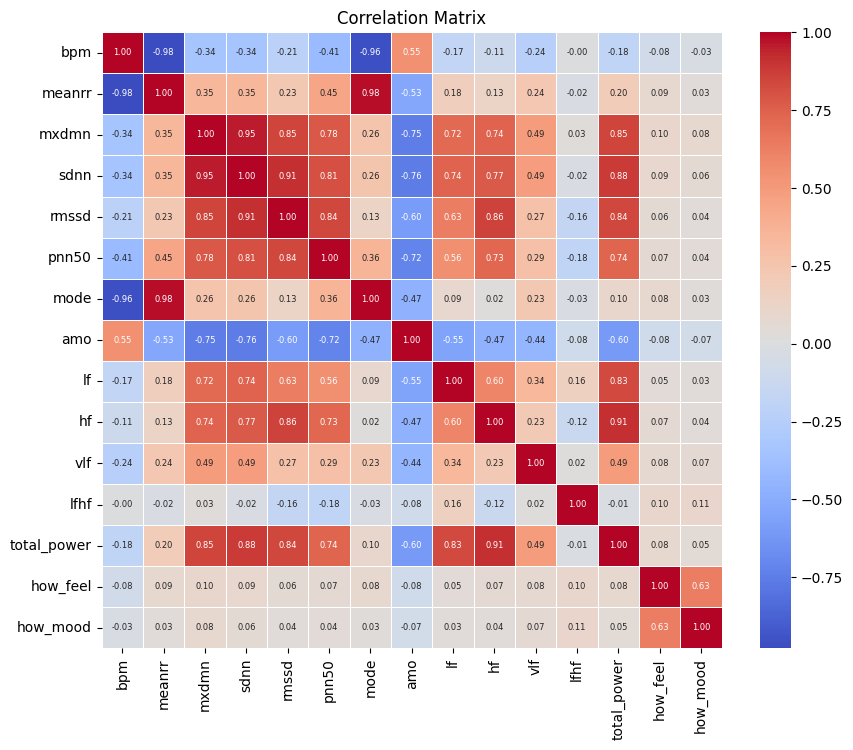

In [31]:
print("Variable Relationships")
print("\n")
print("Correlation Matrix")
correlation_matrix = hrv_measurements[numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 6}, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [32]:
#Visualise Distributions

hrv_measurements[numeric_columns].hist(bins=20, figsize=(10,10), grid=False)
plt.suptitle("Histograms of Numeric Features", y=0.93)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

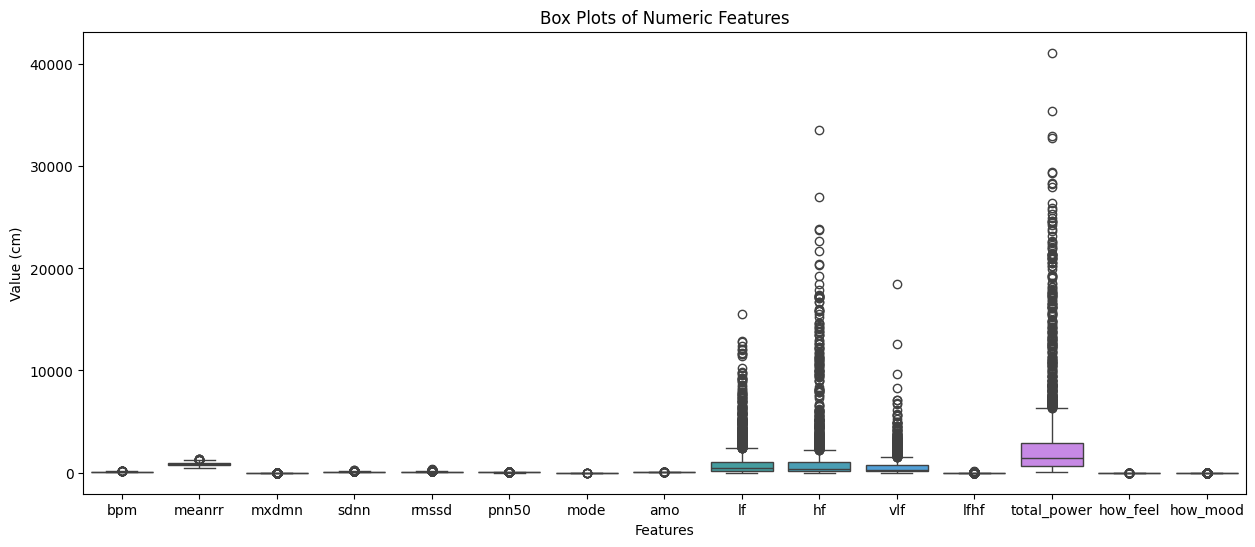

In [402]:
#Box plots to identify outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=hrv_measurements[numeric_columns])
plt.title("Box Plots of Numeric Features")
plt.xlabel("Features")
plt.ylabel("Value (cm)")
plt.show

# remove outliers

In [403]:
# Checking skewness of numeric columns
skewness = hrv_measurements[numeric_columns].apply(lambda x: skew(x.dropna()))
print(skewness)

# Applying log transformation to skewed columns
skewed_columns = skewness[skewness > 0.5].index  # Select highly skewed columns
hrv_measurements[skewed_columns] = hrv_measurements[skewed_columns].apply(lambda x: np.log1p(x))  # log1p(x) = log(1 + x)


bpm            0.482180
meanrr         0.333961
mxdmn          1.692681
sdnn           1.718373
rmssd          2.657165
pnn50          1.404733
mode           0.387645
amo            0.533135
lf             3.800314
hf             5.336946
vlf            6.046065
lfhf           7.981266
total_power    3.790172
how_feel      -0.009400
how_mood      -0.084599
dtype: float64


In [404]:
hrv_measurements[numeric_columns]

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood
0,75,795.90,0.113329,3.845926,4.010492,2.781920,0.775,3.988984,6.232448,6.981935,5.590987,0.386622,7.524021,0,-1
1,70,858.00,0.104360,3.523090,3.527007,2.842581,0.875,4.007333,6.016157,5.739793,5.176150,0.841136,6.797940,0,0
2,83,724.10,0.157004,4.021971,4.204499,2.899772,0.725,3.850148,6.070738,6.782192,5.273000,0.398776,7.318540,-1,-2
3,75,802.64,0.182322,4.293510,4.263229,3.145014,0.825,3.784190,6.703188,7.305188,7.450080,0.436318,8.299286,0,0
4,78,768.07,0.095310,3.422633,3.099912,1.617406,0.775,4.043051,6.194405,4.859812,4.574711,1.572774,6.570883,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,79,762.99,0.182322,4.014616,3.654392,2.842581,0.725,3.663562,6.981006,6.077642,7.173958,1.244443,7.942718,-1,-1
3241,91,655.95,0.148420,3.894470,3.482777,2.311545,0.625,3.496508,7.396949,5.424950,6.661855,2.105596,7.877776,0,0
3242,80,752.38,0.198851,4.161863,4.019172,3.054001,0.775,3.663562,7.867871,6.263398,6.056784,1.788922,8.178077,1,0
3243,77,782.22,0.173953,4.312006,3.985050,2.574138,0.775,3.784190,5.945421,5.323010,7.138073,1.053615,7.519692,-1,0


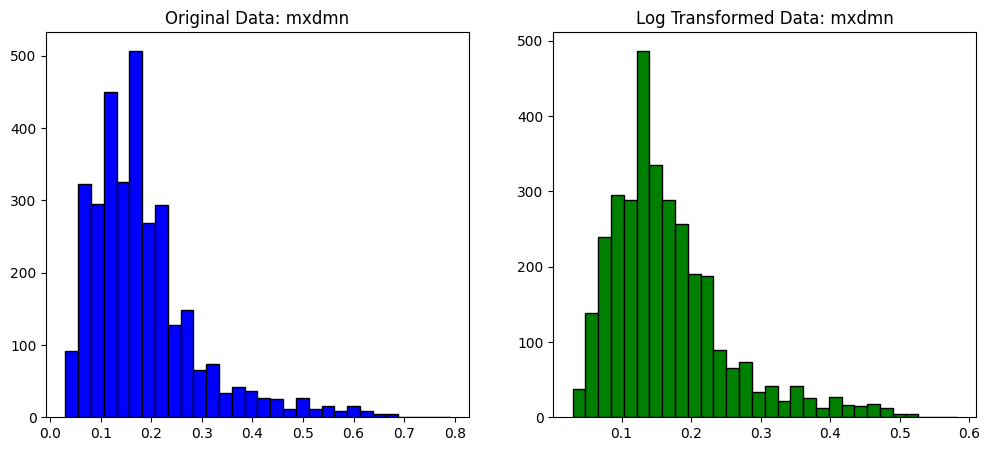

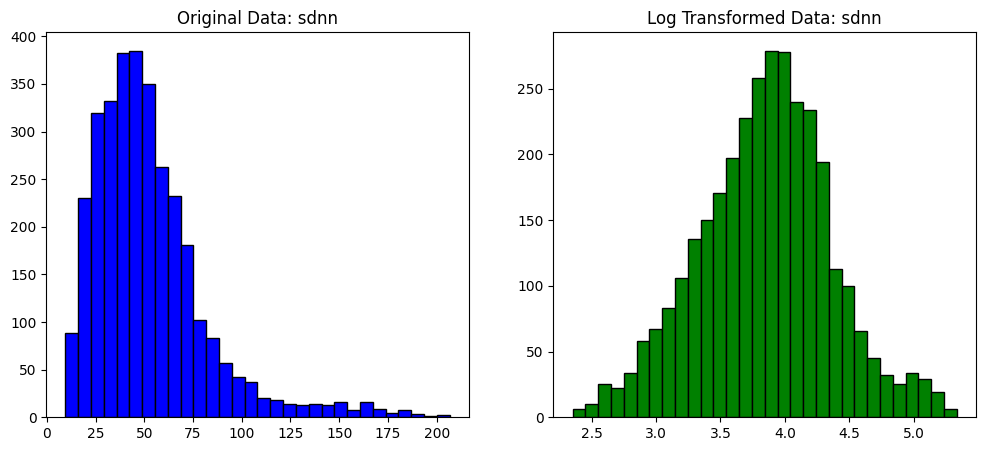

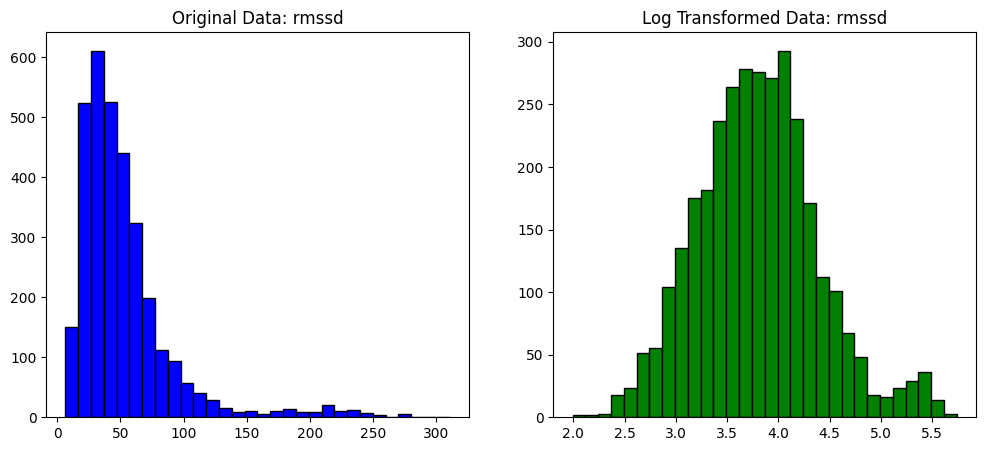

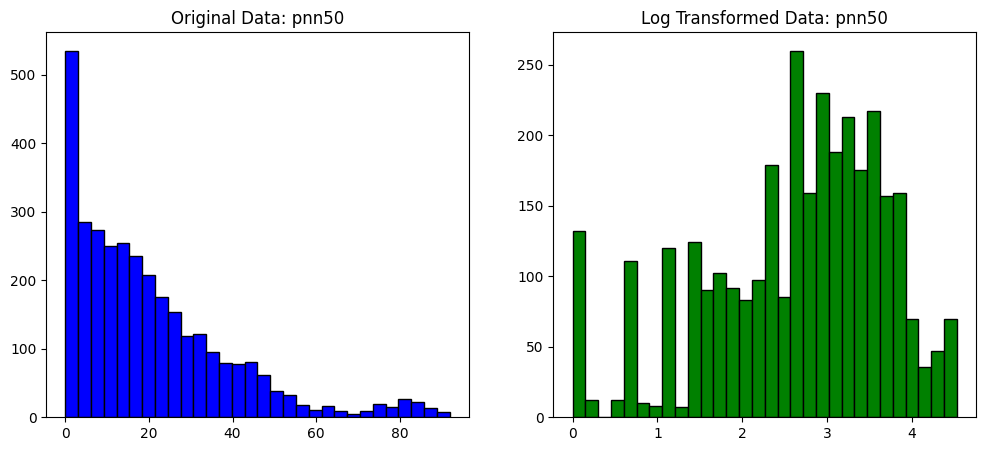

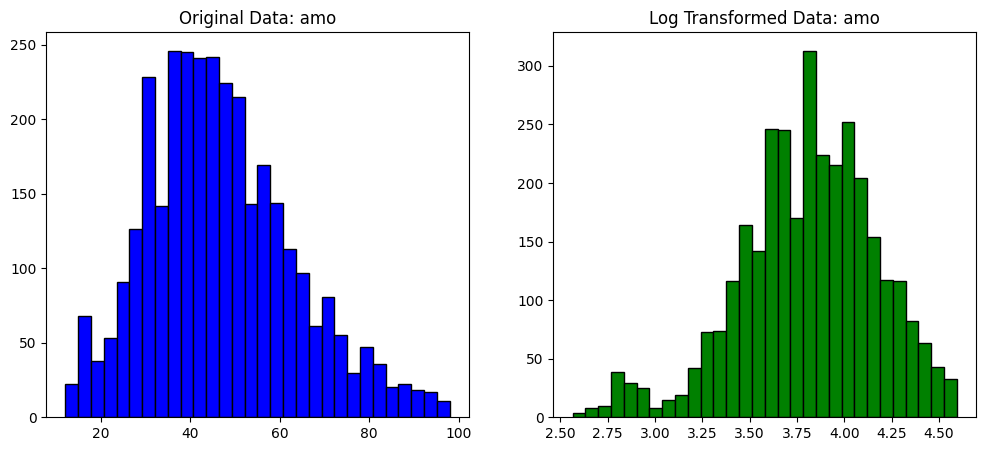

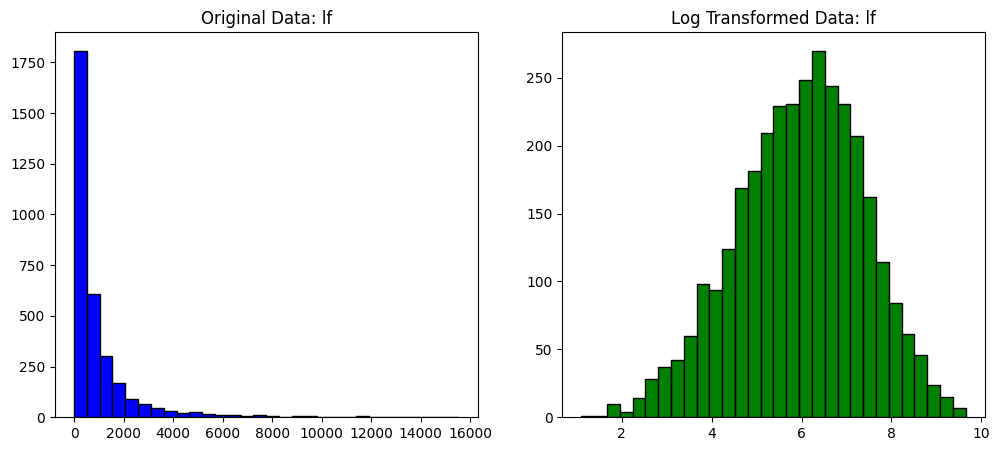

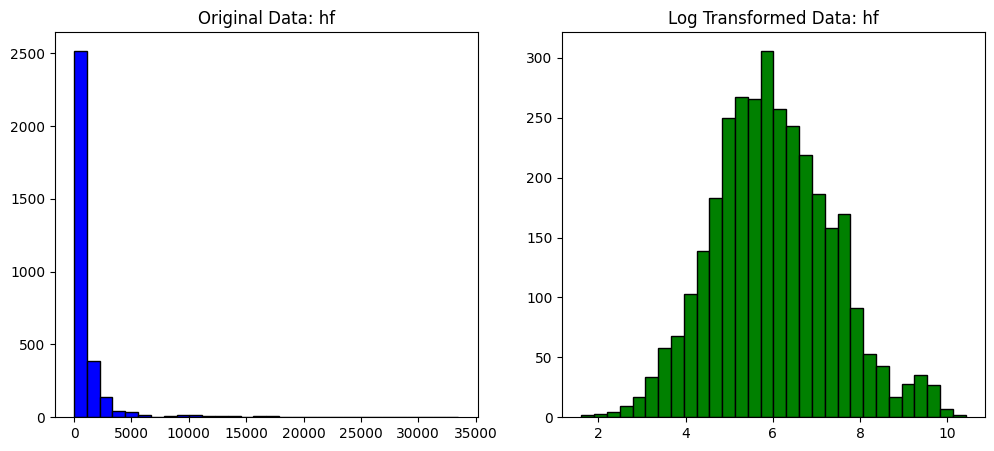

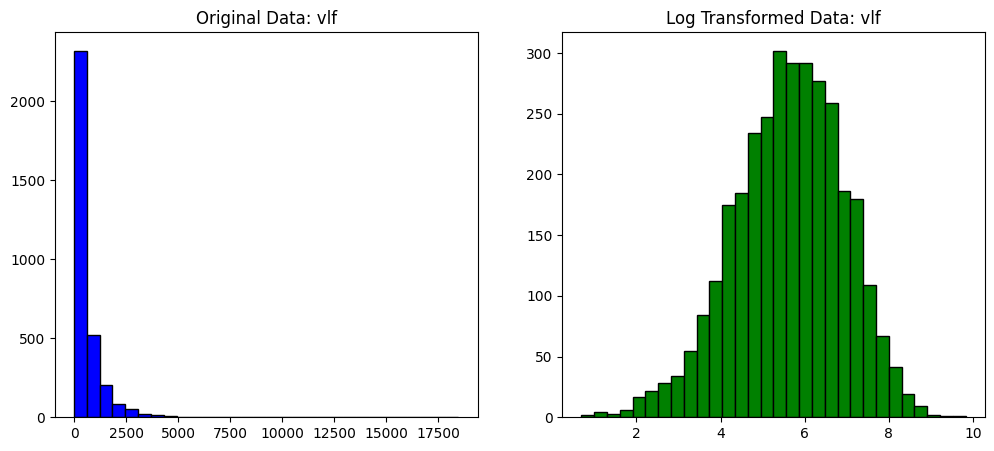

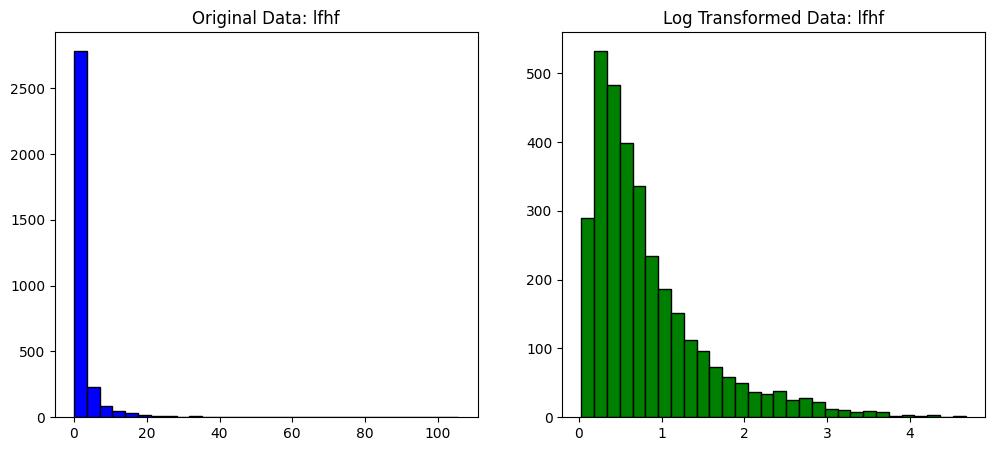

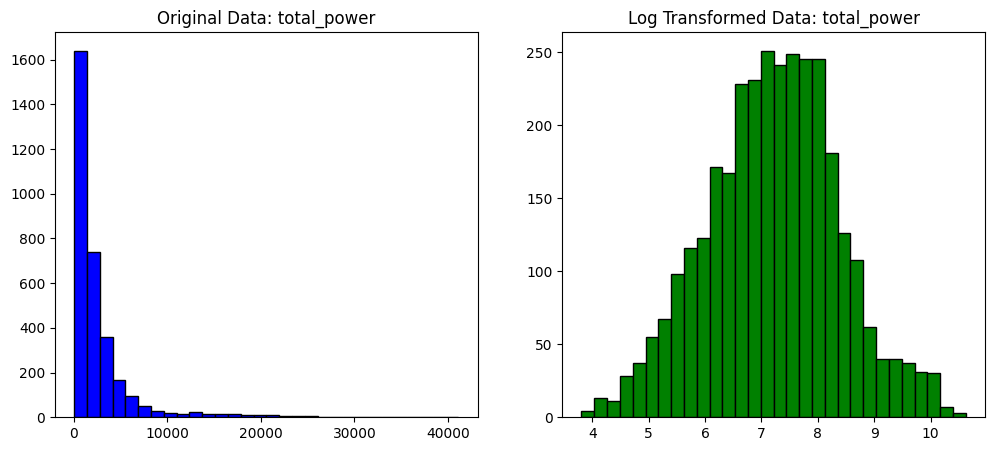

In [405]:
# Plot histograms before and after log transformation
for col in skewed_columns:
    plt.figure(figsize=(12, 5))

    # Original data
    plt.subplot(1, 2, 1)
    plt.hist(hrv_measurements[col].apply(np.expm1), bins=30, color='blue', edgecolor='black')
    plt.title(f'Original Data: {col}')

    # Log-transformed data
    plt.subplot(1, 2, 2)
    plt.hist(hrv_measurements[col], bins=30, color='green', edgecolor='black')
    plt.title(f'Log Transformed Data: {col}')

    plt.show()


In [406]:
# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hrv_measurements[numeric_columns] = scaler.fit_transform(hrv_measurements[numeric_columns])

In [407]:
hrv_measurements[numeric_columns]

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood
0,0.382716,0.366129,0.151577,0.500551,0.538048,0.613875,0.352941,0.701436,0.600346,0.609846,0.536414,0.076571,0.545262,0.50,0.25
1,0.320988,0.437590,0.135348,0.392324,0.409085,0.627261,0.470588,0.710474,0.575053,0.468847,0.490981,0.174573,0.438761,0.50,0.50
2,0.481481,0.283507,0.230604,0.559568,0.589796,0.639881,0.294118,0.633049,0.581435,0.587173,0.501588,0.079192,0.515122,0.25,0.00
3,0.382716,0.373885,0.276415,0.650598,0.605462,0.693997,0.411765,0.600561,0.655394,0.646539,0.740023,0.087286,0.658978,0.50,0.50
4,0.419753,0.334104,0.118973,0.358647,0.295163,0.356906,0.352941,0.728068,0.595897,0.368958,0.425111,0.332328,0.405456,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,0.432099,0.328259,0.276415,0.557102,0.443063,0.627261,0.294118,0.541143,0.687881,0.507198,0.709782,0.261533,0.606676,0.25,0.25
3241,0.580247,0.205084,0.215072,0.516825,0.397287,0.510079,0.176471,0.458857,0.736521,0.433109,0.653696,0.447214,0.597151,0.50,0.50
3242,0.444444,0.316049,0.306324,0.606465,0.540363,0.673914,0.352941,0.541143,0.791591,0.528283,0.587429,0.378933,0.641199,0.75,0.50
3243,0.407407,0.350387,0.261273,0.656799,0.531261,0.568024,0.352941,0.600561,0.566781,0.421537,0.705852,0.220387,0.544627,0.25,0.50


In [408]:
#Feature Engineering

# using correlation
correlation = hrv_measurements[['meanrr', 'mode']].corr() # maybe remove one of these
print(correlation)

#using boxplot - remove how_mood, how_sleep

        meanrr    mode
meanrr  1.0000  0.9794
mode    0.9794  1.0000


In [409]:
# handling missing data
for column in hrv_measurements:
    print(column, hrv_measurements[column].shape)
print( "\n\n\n")
print(f"Missing values: \n {hrv_measurements.isnull().sum()}")
hrv_measurements = hrv_measurements.drop(columns=['how_sleep','tags'])
numeric_columns = hrv_measurements.select_dtypes(include=[np.number]).columns
#remove tags, how_sleep

user_code (3245,)
rr_code (3245,)
measurement_datetime (3245,)
time_of_day (3245,)
bpm (3245,)
meanrr (3245,)
mxdmn (3245,)
sdnn (3245,)
rmssd (3245,)
pnn50 (3245,)
mode (3245,)
amo (3245,)
lf (3245,)
hf (3245,)
vlf (3245,)
lfhf (3245,)
total_power (3245,)
how_feel (3245,)
how_mood (3245,)
tags (3245,)
rr_data (3245,)




Missing values: 
 user_code                  0
rr_code                    0
measurement_datetime       0
time_of_day                0
bpm                        0
meanrr                     0
mxdmn                      0
sdnn                       0
rmssd                      0
pnn50                      0
mode                       0
amo                        0
lf                         0
hf                         0
vlf                        0
lfhf                       0
total_power                0
how_feel                   0
how_mood                   0
tags                    1044
rr_data                    0
dtype: int64


KeyError: "['how_sleep'] not found in axis"

In [277]:
for col in hrv_measurements[numeric_columns]:
    print(hrv_measurements[col])

0       0.382716
1       0.320988
2       0.481481
3       0.382716
4       0.419753
          ...   
3240    0.432099
3241    0.580247
3242    0.444444
3243    0.407407
3244    0.444444
Name: bpm, Length: 3245, dtype: float64
0       0.366129
1       0.437590
2       0.283507
3       0.373885
4       0.334104
          ...   
3240    0.328259
3241    0.205084
3242    0.316049
3243    0.350387
3244    0.305716
Name: meanrr, Length: 3245, dtype: float64
0       0.151577
1       0.135348
2       0.230604
3       0.276415
4       0.118973
          ...   
3240    0.276415
3241    0.215072
3242    0.306324
3243    0.261273
3244    0.167661
Name: mxdmn, Length: 3245, dtype: float64
0       0.500551
1       0.392324
2       0.559568
3       0.650598
4       0.358647
          ...   
3240    0.557102
3241    0.516825
3242    0.606465
3243    0.656799
3244    0.393667
Name: sdnn, Length: 3245, dtype: float64
0       0.538048
1       0.409085
2       0.589796
3       0.605462
4       0.295163
 

In [278]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# Initialize an empty list to store mutual information scores
mi_scores = []

# Compute mutual information between each feature and the rest of the features
for col in hrv_measurements[numeric_columns]:
    # Treat each feature as the target (y) and the remaining as X
    mi = mutual_info_regression(hrv_measurements[numeric_columns].drop(columns=[col]), hrv_measurements[col])
    # Append the mean mutual information score for the feature
    mi_scores.append(np.mean(mi))

# Convert the list of MI scores to a NumPy array for sorting
mi_scores = np.array(mi_scores)

# Rank the features by their mutual information score
ranked_features_indices = np.argsort(mi_scores)[-10:]  # Select top 10 features

# Select the top 10 features from the original dataset
ranked_features = [numeric_columns[i] for i in ranked_features_indices]
hrv_mi_selected = hrv_measurements[ranked_features]

# Display the top 10 features
print(f"Top 10 selected features based on mutual information: {ranked_features}")


Top 10 selected features based on mutual information: ['hf', 'rmssd', 'pnn50', 'mode', 'amo', 'mxdmn', 'total_power', 'sdnn', 'bpm', 'meanrr']


In [279]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat((dfcolumns,dfscores), axis=1)
featureScores.columns = ['Specs','Score']
featureScores

NameError: name 'x' is not defined

In [ ]:
print(blood_pressure['user_code'].nunique())
print(heart_rate['user_code'].nunique())
print(hrv_measurements['user_code'].nunique())
print(participants['user_code'].nunique())
print(sleep['user_code'].nunique())
print(surveys['user_code'].nunique())
print(wearables['user_code'].nunique())
print(weather['user_code'].nunique())

# One new feature is engineered and documented


In [54]:
df_bp=pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/refs/heads/master/data/blood_pressure.csv')

In [16]:
# Creating new feature 
# Pulse Pressure (PP) is the difference between systolic and diastolic blood pressure.
# It indicates the force that the heart generates with each contraction and can be a predictor of cardiovascular health risks


In [55]:
# Creating new feature - PP
df_bp['pp']=df_bp['systolic']-df_bp['diastolic']

In [56]:
# Selecting only 1 user to visualize as a bar chart
df_fea_engg=df_bp[df_bp['user_code']=='01bad5a519'][['user_code','measurement_datetime','pp']]

In [57]:
# change datatype and extract month from measurement_datetime
import datetime as dt
df_fea_engg['measurement_datetime'] = pd.to_datetime(df_fea_engg['measurement_datetime'])
df_fea_engg['month'] = df_fea_engg['measurement_datetime'].dt.strftime('%m')
df_fea_engg=df_fea_engg.drop(["measurement_datetime"], axis=1)
df_fea_engg=df_fea_engg.drop(["user_code"], axis=1)

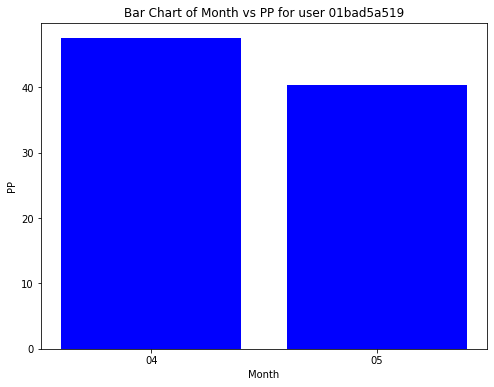

In [63]:
# visualize as bar chart
plt.figure(figsize=(8,6))
plt.bar(df_fea_engg.groupby('month').mean().reset_index()['month'], df_fea_engg.groupby('month').mean().reset_index()['pp'], color='blue')
plt.title('Bar Chart of Month vs PP for user 01bad5a519')
plt.xlabel('Month')
plt.ylabel('PP')
plt.show()

# A dimensionality reduction method is performed and interpreted

In [12]:
# Conducting dimensionality reduction with blood pressure csv

# Data preprocessing - cleaning - dropping rows containing NA values as we don't have domain expertise    

selected_columns = ['diastolic', 'systolic', 'functional_changes_index', 'circulatory_efficiency', 'robinson_index']
df_bp_curated = df_bp[selected_columns].dropna()

# Standarding

scaler = StandardScaler()
df_bp_scaled = scaler.fit_transform(df_bp_curated)

In [13]:
# Creating PCA model

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_bp_scaled)

# Creating a new DataFrame to hold the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

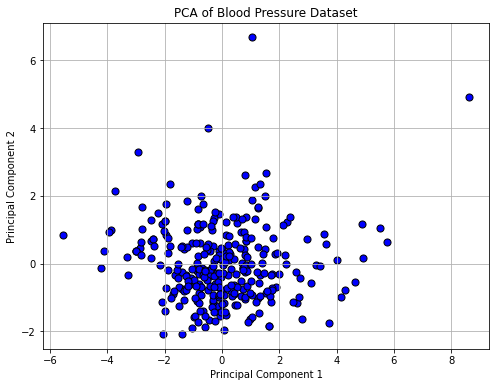

In [15]:
# Visualize final dataframe with 2 dimensions

plt.figure(figsize=(8,6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c='blue', edgecolor='k', s=50)
plt.title('PCA of Blood Pressure Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()